## Visualize bounding boxes

In [19]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline


## Plot one example
### Set paths

In [16]:
path_labels = "../Individual_imgs/automated_labels/labels_with_ids/"
path_images = "../Individual_imgs/automated_labels/images/"



In [17]:
def plotBBox(img_id, img_path, label_path, ending = ".jpg"):
    """
    img_id: name of the image file (without ending)
    img_path: path to the images
    label_path: path to the labels
    ending: type of image .jpg, .png, .JPG
    """
    coords = pd.read_csv(label_path + img_id + ".txt", header = None, 
                       sep = " ")
    print(coords)
    im = cv2.imread(img_path + img_id + ending)
    
    im_h, im_w = im.shape[:2]

    for i in range(len(coords)):
        center = tuple(map(int, (im_w * coords.iloc[i, 2], im_h * coords.iloc[i, 3])))
        low_left = tuple(map(int, (im_w * (coords.iloc[i, 2] - coords.iloc[i, 4]/2),
                                   im_h * (coords.iloc[i, 3] - coords.iloc[i, 5]/2))))
        up_right = tuple(map(int, (im_w * (coords.iloc[i, 2] + coords.iloc[i, 4]/2), 
                                 im_h * (coords.iloc[i, 3] + coords.iloc[i, 5]/2))))

        color = (i * 100 % 255, i * 75 % 255, i * 50 % 255)
        im = cv2.circle(im, center, radius = 2, color = color, thickness = 5)
        im = cv2.rectangle(im, low_left, up_right, color = color, thickness = 5)
        
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    
    plt.show()

In [ ]:
os.listdir(path_images)

   0    1         2         3         4         5  6
0  0  111  0.532083  0.706462  0.171545  0.276328  5
1  0  113  0.809658  0.456736  0.029866  0.067017  7
2  0  114  0.973820  0.668577  0.050140  0.155238  4
3  1    2  0.450526  0.694399  0.176665  0.260805  7
4  1   16  0.871434  0.733488  0.141420  0.226815  7


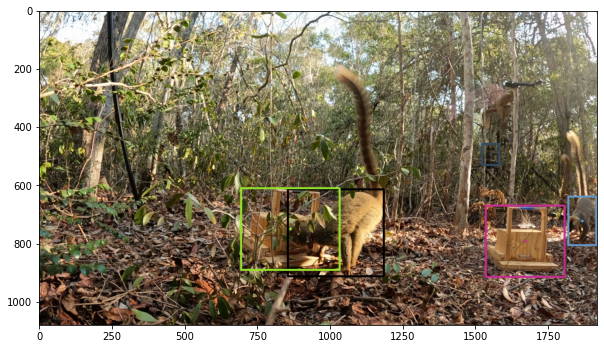

In [23]:
plotBBox('a_e_1_220918_c1_27871', path_images, path_labels)

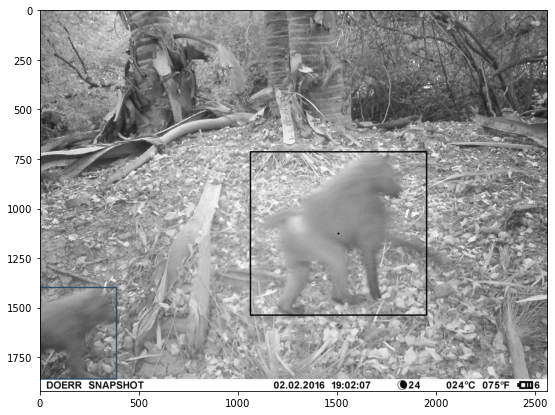

In [5]:

plotBBox('IMAG0034%20-%202015%20-%20jan%20-%20ct3', 
         '../Labelling/Baboons/images/',
        '../Labelling/Baboons/labels_with_ids/',
        '.JPG')
